# Importations

In [1]:
import numpy as np                       # gestion des données et fonctions usuelles
import matplotlib.pyplot as plt          # graphiques

from scipy.integrate import solve_ivp    # résolution d'équations différentielles

# Équation différentielle
---
L'état du pendule est défini par sa *position* et sa *vitesse*, comme on a eu l'occasion de le voir avec les représentations dans l'espace des phases. Plutôt que d'en faire deux variables séparées, on créé un « vecteur » état du pendule, c'est-à-dire un objet avec $\theta$ en première coordonnée et $\dot{\theta}$ sur la seconde.

On cherche donc à trouver la dérivée de cet état à chaque instant pour savoir comment il varie dans le temps. C'est l'équation différentielle qui fait ce travail, liant $\theta$ à $\ddot{\theta}$. Si on note $f$ cette fonction représentant l'équation différentielle, on s'intéresse donc au système

\begin{align*}
\Large
\begin{pmatrix}
    \dot{\theta}\\
    \ddot{\theta}
\end{pmatrix}
&
\Large
= f
\begin{pmatrix}
    \theta\\
    \dot{\theta}
\end{pmatrix}
\\
\Large
\Leftrightarrow
\begin{pmatrix}
    \dot{\theta}\\
    -\dfrac{g\sin\theta}{\ell}
\end{pmatrix}
&
\Large
= f\begin{pmatrix}
    \theta\\
    \dot{\theta}
\end{pmatrix}
\end{align*}

On créé donc une fonction du temps et de l'état du pendule, traduisant l'équation différentielle reliant l'angle $\theta$ à sa dérivée seconde. On retourne la dérivée de l'état du pendule, c'est-à-dire $\dot{\theta}$ et $\ddot{\theta}$. La première valeur retournée est donc simplement $\dot{\theta}$, soit ici `y[1]`, et la seconde est $\ddot{\theta}$ donc $\dfrac{-g\sin\theta}{\ell}$.

In [2]:
def eqdiff_pendule(t, y):
    # t le temps
    # y l'état du pendule
    # y[0] = theta
    # y[1] = thetadot
    return(y[1],
          -g*np.sin(y[0])/ell)

# Initialisation

In [3]:
# Définition des constantes : à vous d'indiquer les pertinentes
g = 9.81                    # m.s^{-2}
ell = 1                     # m
m = 0.1                     # kg, donc 100g
w0 = np.sqrt(g/ell)          # rad.s^{-1}
T0 = 2*np.pi*np.sqrt(ell/g) # s

# Conditions initiales
theta_0 = np.deg2rad(170) # rad pour être dans le `np.sin`
thetadot_0 = 0            # rad.s^{-1}

# Résolution
`solve_ivp` est une fonction de résolution qui prend comme arguments successifs :
- une équation
- une liste de 2 éléments avec le début du temps et la fin du temps de résolution
- les conditions initiales
- les temps précis sur lesquels on veut résoudre

In [4]:
tmax = 10
sol = solve_ivp(
    eqdiff_pendule,                       # Notre équation
    [0,tmax],                             # On se limite de 0 à tmax secondes
    (theta_0, thetadot_0),                # Conditions initiales
    t_eval=np.linspace(0, tmax, 30*tmax), # Pour chaque seconde on calcule 30 fois l'état
    rtol=1e-8                             # tolérance de calcul (évite les solutions négatives)
)

# Résultat de résolution
La fonction `solve_ivp` stocke dans l'objet `sol` :
- les temps de résolution avec `sol.t`
- l'état du pendule à chaque temps `t` avec `sol.y`

In [5]:
t = sol.t           # Lecture des instants de solutions
theta = sol.y[0]    # Lecture de theta
thetadot = sol.y[1] # Lecture de theta point

theta_deg = np.rad2deg(theta)       # Converion en degrés pour nous faciliter la compréhension
thetadot_deg = np.rad2deg(thetadot) # Converion en degrés pour nous faciliter la compréhension

# Graphique de $\theta$ et $\dot{\theta}$ dans le temps

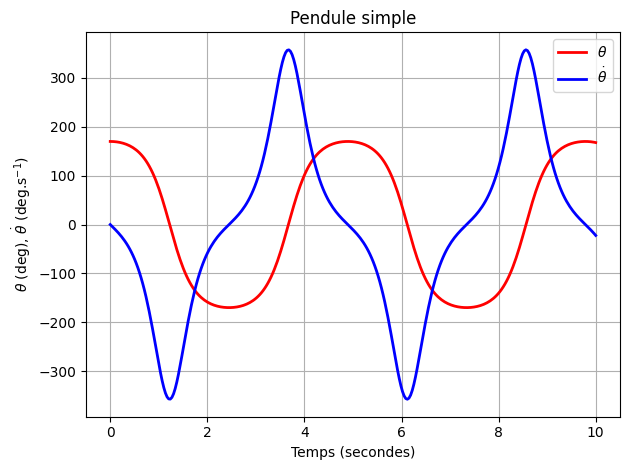

In [6]:
plt.close()
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, thetadot_deg, 'b', lw=2, label=r'$\dot{\theta}$')

plt.title('Pendule simple')
plt.legend()

plt.xlabel('Temps (secondes)')
plt.ylabel(r'$\theta$ (deg), $\dot{\theta}$ (deg.s$^{-1}$)')
plt.grid()
plt.tight_layout()
plt.show()

## Période en fonction de l'angle initial

itération 1/50
theta_0 = 0.57°


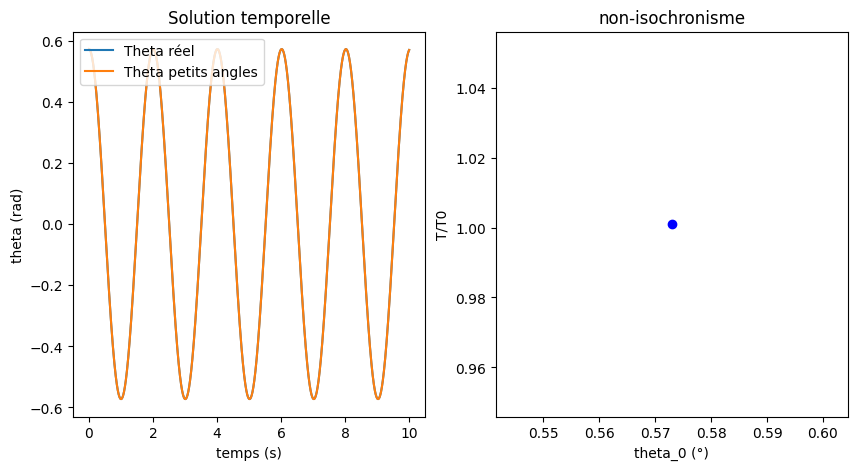

itération 2/50
itération 3/50
itération 4/50
itération 5/50
itération 6/50
theta_0 = 17.05°


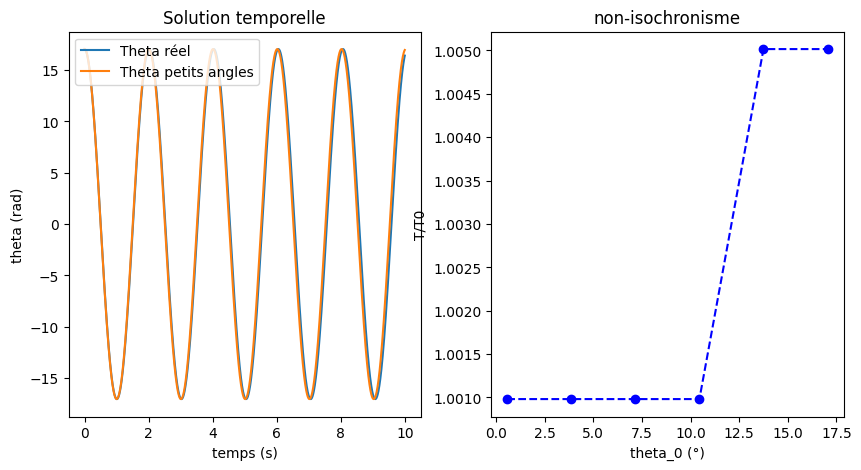

itération 7/50
itération 8/50
itération 9/50
itération 10/50
itération 11/50
theta_0 = 33.52°


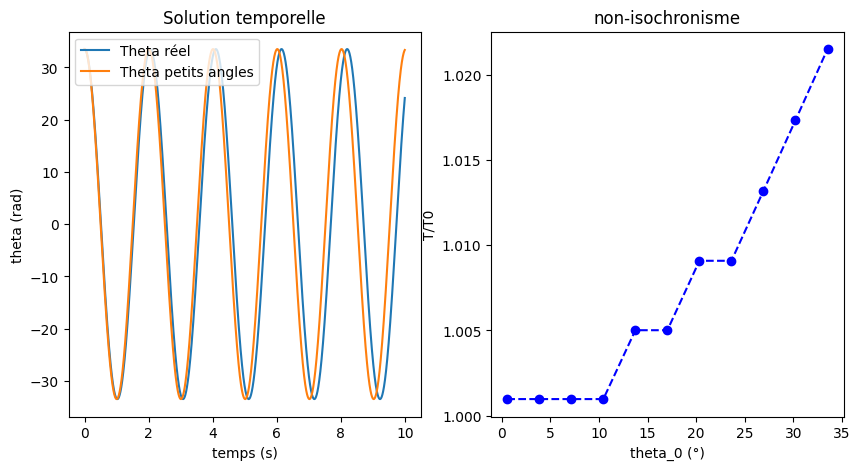

itération 12/50
itération 13/50
itération 14/50
itération 15/50
itération 16/50
theta_0 = 49.99°


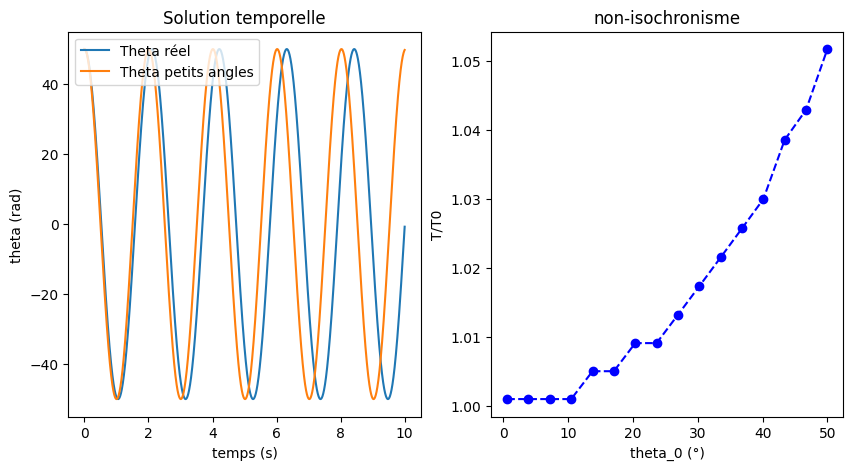

itération 17/50
itération 18/50
itération 19/50
itération 20/50
itération 21/50
theta_0 = 66.46°


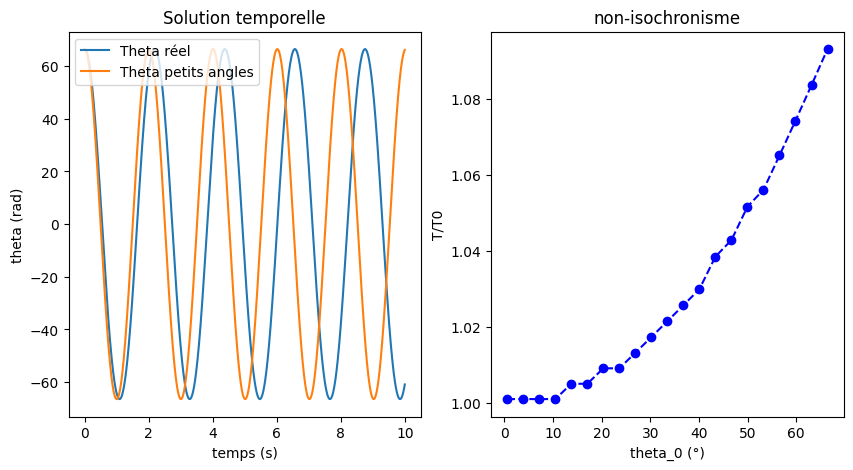

itération 22/50
itération 23/50
itération 24/50
itération 25/50
itération 26/50
theta_0 = 82.93°


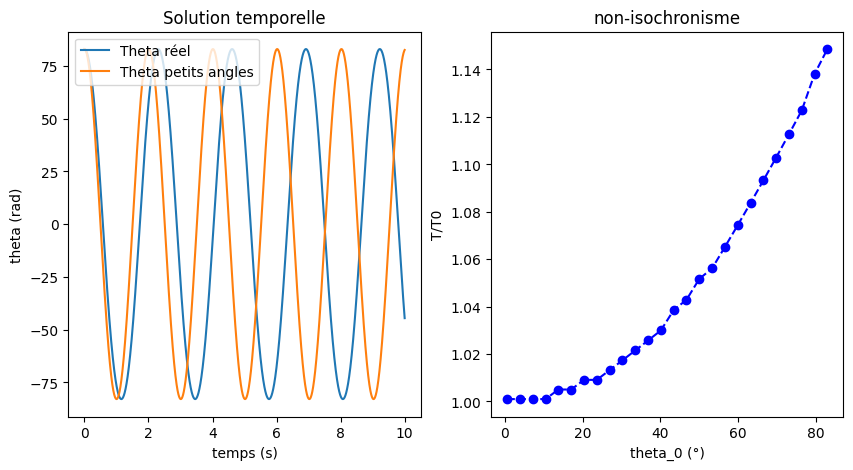

itération 27/50
itération 28/50
itération 29/50
itération 30/50
itération 31/50
theta_0 = 99.41°


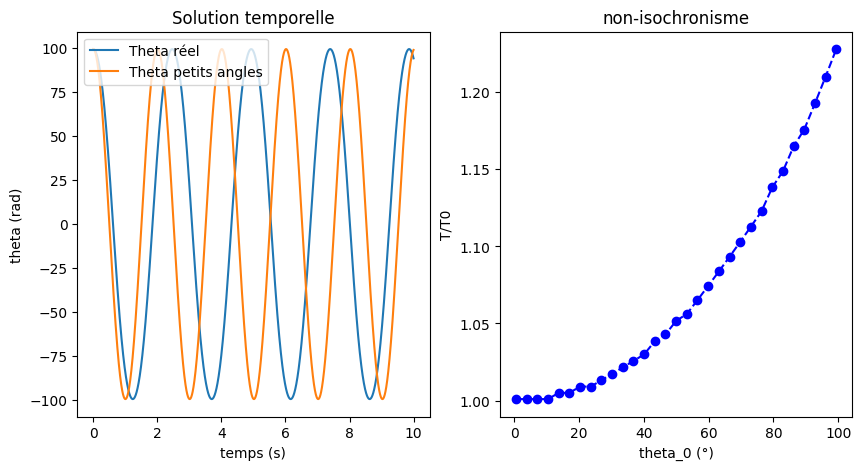

itération 32/50
itération 33/50
itération 34/50
itération 35/50
itération 36/50
theta_0 = 115.88°


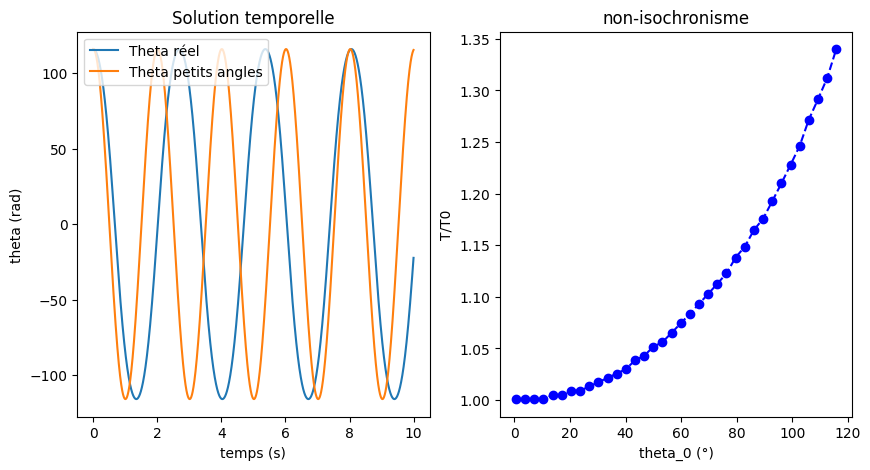

itération 37/50
itération 38/50
itération 39/50
itération 40/50
itération 41/50
theta_0 = 132.35°


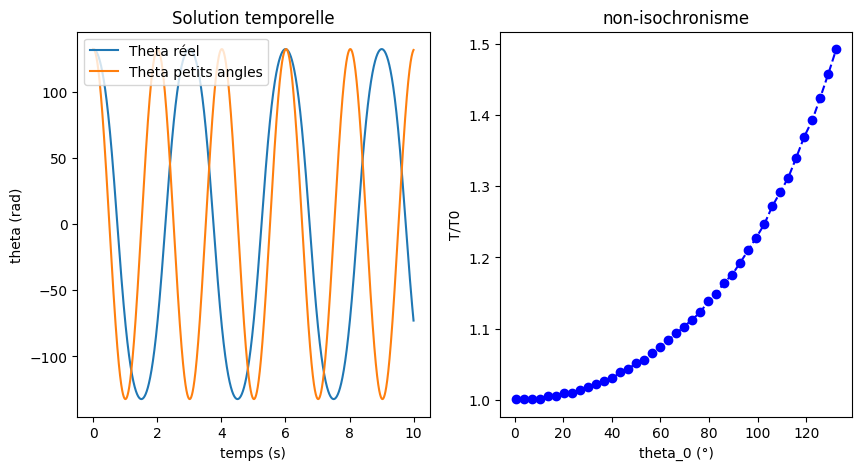

itération 42/50
itération 43/50
itération 44/50
itération 45/50
itération 46/50
theta_0 = 148.82°


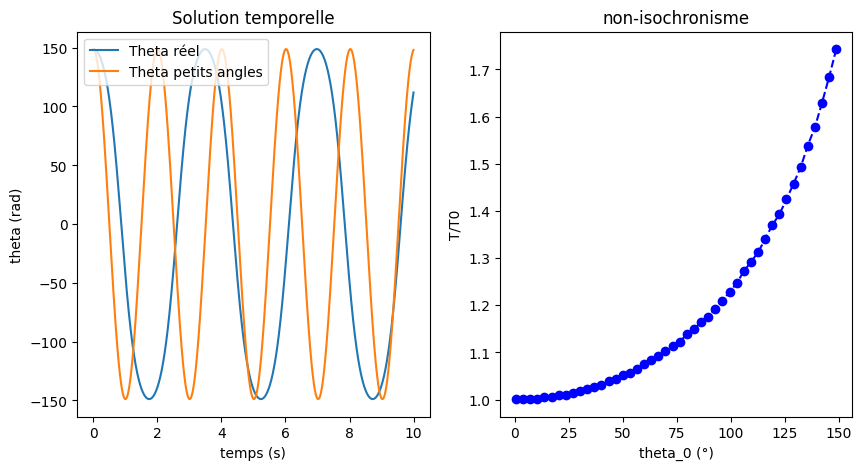

itération 47/50
itération 48/50
itération 49/50
itération 50/50
theta_0 = 162.00°


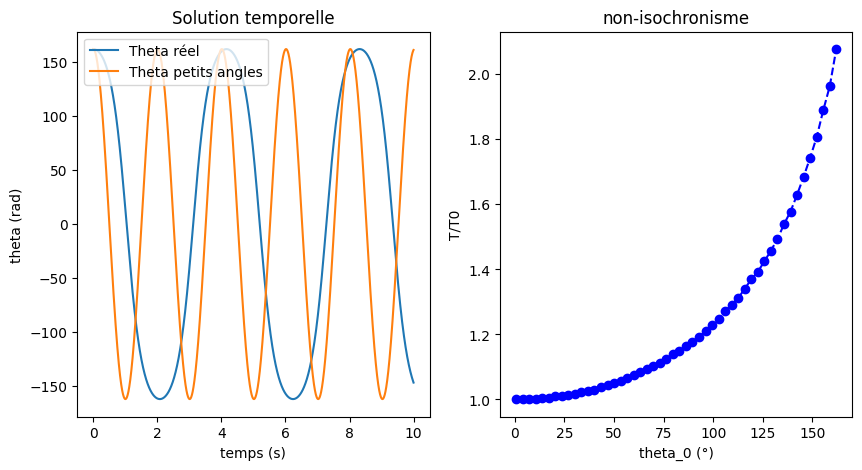

In [10]:
################################ NE PAS TOUCHER ########################

def freqfinder(sig, fe):
    n = len(sig)            # longueur du signal
    k = np.arange(n)
    T = n/fe
    frq = k/T               # vecteur des fréquences
    frq = frq[:len(frq)//2] # on se place sur f in 0:fe/2
    Y = np.fft.fft(sig)/n   # TF directe et normalisation
    Y = Y[:len(frq)]
    maxPos = np.argmax(abs(Y))
    frqMax = frq[maxPos]
    return frqMax

########################################################################

nb_CI = 50                  # Nombre de conditions initiales explorées
duree = 500                 # en secondes
nb_pt_temporel = 500*duree
fe = nb_pt_temporel/duree   # fréquence d'échantillonnage

t = np.linspace(0, duree,
                nb_pt_temporel) # Le temps total d’intégration
x0 = np.linspace(1e-2, 0.9*np.pi,
                 nb_CI)         #  Les  positions  initiales  choisies, on va jusqu'à pi/2
v0 = [0]*nb_CI                  #  Les  vitesses   initiales  choisies

periode = []                    # initialise le vecteur des périodes

for i in range(nb_CI):    #  Pour  chaque  condition  initiale
    sol = solve_ivp(
        eqdiff_pendule,
        [0,duree],
        (x0[i], v0[i]),
        t_eval=np.linspace(0, duree, nb_pt_temporel),
        rtol=1e-8
    )
    x = sol.y[0]                        # Récupération  du vecteur  position
    v = sol.y[1]
    periode.append(1/freqfinder(x, fe)) # accumulation de chaque période
    print(f"itération {str(i+1)}/{nb_CI}")

    ################################ NE PAS TOUCHER ########################

    # affichage tous les 5 itérations
    if i%5 == 0:
        theta_0 = np.rad2deg(x0[:i+1])
        thetadot_0 = np.rad2deg(v0[:i+1])
        theta_deg = np.rad2deg(x)
        thetadot_deg = np.rad2deg(v)
        print(f'theta_0 = {theta_0[-1]:.2f}°')

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

        ax1.set_title('Solution temporelle')
        tshow = 10
        ax1.plot(t[t<tshow], theta_deg[t<tshow], label='Theta réel')
        # ax1.plot(t[t<tshow], thetadot_deg[t<tshow], color='r', label='theta_dot')
        ax1.plot(t[t<tshow], theta_0[-1]*np.cos(w0*t[t<tshow]), label='Theta petits angles')
        ax1.set_xlabel('temps (s)')
        ax1.set_ylabel('theta (rad)')
        ax1.legend(loc="upper left")

        ax2.set_title('non-isochronisme')
        ax2.plot(theta_0, periode/T0,
                 linestyle='--',
                 marker='o', color='b')
        ax2.set_xlabel('theta_0 (°)')
        ax2.set_ylabel('T/T0')

        plt.show()

# affichage final
theta_0 = np.rad2deg(x0)
thetadot_0 = np.rad2deg(v0)
theta_deg = np.rad2deg(x)
thetadot_deg = np.rad2deg(v)
print(f'theta_0 = {theta_0[-1]:.2f}°')

########################################################################

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Solution temporelle')
tshow = 10
ax1.plot(t[t<tshow], theta_deg[t<tshow], label='Theta réel')
# ax1.plot(t[t<tshow], thetadot_deg[t<tshow], color='r', label='theta_dot')
ax1.plot(t[t<tshow], theta_0[-1]*np.cos(w0*t[t<tshow]), label='Theta petits angles')
ax1.set_xlabel('temps (s)')
ax1.set_ylabel('theta (rad)')
ax1.legend(loc="upper left")

ax2.set_title('non-isochronisme')
ax2.plot(theta_0, periode/T0,
         linestyle='--',
         marker='o', color='b')
ax2.set_xlabel('theta_0 (°)')
ax2.set_ylabel('T/T0')

plt.show()
